In [1]:
import os

# Print the current working directory
print("Current working directory:", os.getcwd())

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
timestr = time.strftime("%Y%m%d-%H%M%S")

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 30})
plt.rc('xtick', labelsize=30) 
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

Current working directory: /home/zhk26714/env_dwave/QC-config/code


## Simulated annealing scaling plot

The slope (gradient) of the log-log plot is: 1.428466973510502


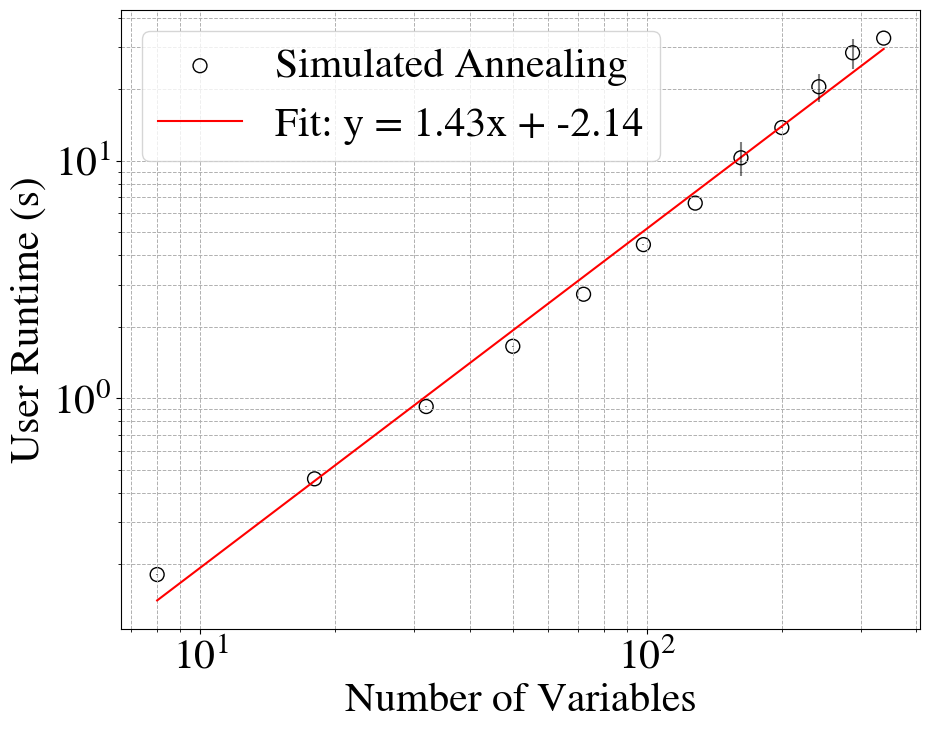

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read in data
dfsSA = []
for i in range(12):
    nsuper = i+2
    dfsSA.append(pd.read_csv(f"RawResults/SA_nsuper{nsuper}_nV3.csv"))

big_dfSA = pd.concat(dfsSA, ignore_index=True)

nsuper = [8,18,32,50,72,98,128,162,200,242,288,338] 

time_avg = big_dfSA['Time_avg'].values
time_std = big_dfSA['Time_std'].values

# Take the logarithm of the data
log_nsuper = np.log10(nsuper)
log_time_avg = np.log10(time_avg)

# Perform linear regression on the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_nsuper, log_time_avg)

# Print the slope (gradient)
print(f"The slope (gradient) of the log-log plot is: {slope}")

# Plotting the data and the linear fit on the log-log scale
plt.figure(figsize=(10, 8))
plt.scatter(nsuper, time_avg, s=100, marker='o', edgecolor='black', facecolors='none', label='Simulated Annealing')
plt.plot(nsuper, 10**(intercept + slope * log_nsuper), color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')

plt.errorbar(nsuper, time_avg, yerr=time_std, fmt='none', color='black', alpha=0.5)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Number of Variables')
plt.ylabel('User Runtime (s)')
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('final_plots/SCALINGplotTime_with_fit_SA.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Quantum annealing and simulated annealing

In [3]:
n = 6#2
colour = cm.viridis(np.linspace(0, 1, n+1))

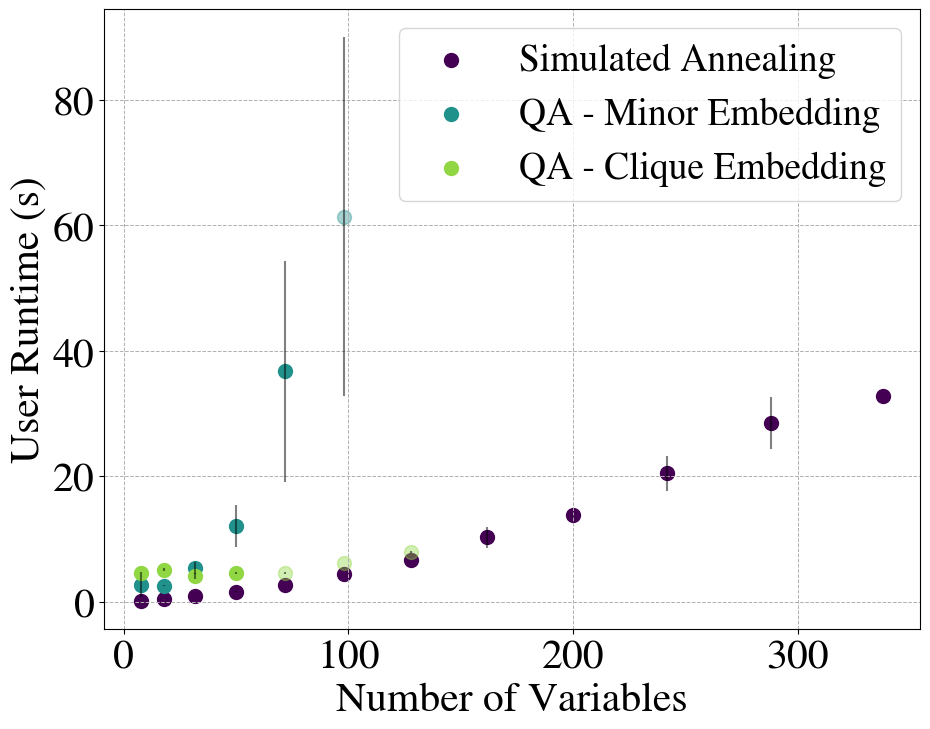

In [4]:
# Assuming you have the necessary data
nsuper_QA = [8,18,32,50,72]

dfsQA = []

time_avg_QA = []
time_std_QA  = []
for i in range(6):
    nsuper = i+2
    df = pd.read_csv(f"RawResults/QA_minor_nsuper{nsuper}_nV3.csv")
    time_avg_QA.append(df['Time_avg'].values)
    time_avg_QA = [float(a) for a in time_avg_QA]
    time_std_QA.append(df['Time_std'].values)
    time_std_QA = [float(a) for a in time_std_QA]


time_avg_QA_clique  = []
time_std_QA_clique  = []
for i in range(7):
    nsuper = i+2
    df = pd.read_csv(f"RawResults/QA_clique_nsuper{nsuper}_nV3.csv")
    time_avg_QA_clique.append(df['Time_avg'].values)
    time_avg_QA_clique = [float(a) for a in time_avg_QA_clique]
    time_std_QA_clique.append(df['Time_std'].values)
    time_std_QA_clique = [float(a) for a in time_std_QA_clique]


alpha_sub_opt = 0.4
alpha_QA = [1.0] * (len(time_avg_QA) - 1) + [alpha_sub_opt, alpha_sub_opt]  # Last two points less opaque
alpha_QA_clique = [1.0] * (len(time_avg_QA_clique) - 3) + [alpha_sub_opt] * 3


nsuper = [8,18,32,50,72,98,128,162,200,242,288, 338]
nsuper_QA = [8,18,32,50,72,98]
nsuper_QA_clique = [8,18,32,50,72,98,128]


# Plotting the data and the linear fit on the log-log scale
plt.figure(figsize=(10, 8))

# Simulated Annealing
plt.scatter(nsuper, time_avg, s=100, color=colour[0],
            label='Simulated Annealing')
plt.errorbar(nsuper, time_avg, yerr=time_std, fmt='none', color='black', alpha=0.5)

# QA - Minor Embedding
for i, (x, y) in enumerate(zip(nsuper_QA, time_avg_QA)):
    label = 'QA - Minor Embedding' if i == 0 else ''  # Add label only for the first point
    opacity = alpha_QA[i]
    plt.scatter([x], [y], s=100,color=colour[3], 
                alpha=opacity, label=label)
plt.errorbar(nsuper_QA, time_avg_QA, yerr=time_std_QA, fmt='none', color='black', alpha=0.5)

# QA - Clique Embedding
for i, (x, y) in enumerate(zip(nsuper_QA_clique, time_avg_QA_clique)):
    label = 'QA - Clique Embedding' if i == 0 else ''  # Add label only for the first point
    opacity = alpha_QA_clique[i]
    plt.scatter([x], [y], s=100, color=colour[5], 
                 alpha=opacity, label=label)
plt.errorbar(nsuper_QA_clique, time_avg_QA_clique, yerr=time_std_QA_clique, fmt='none', color='black', alpha=0.5)
# plt.xscale('log')
# plt.yscale('log')

# Labels and grid
plt.xlabel('Number of Variables')
plt.ylabel('User Runtime (s)')
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend(fontsize=27)
plt.tight_layout()

# Save and show the plot
plt.savefig('final_plots/SCALINGplotTime_no_log_SA.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Same data on a log-log plot - to reveal scaling

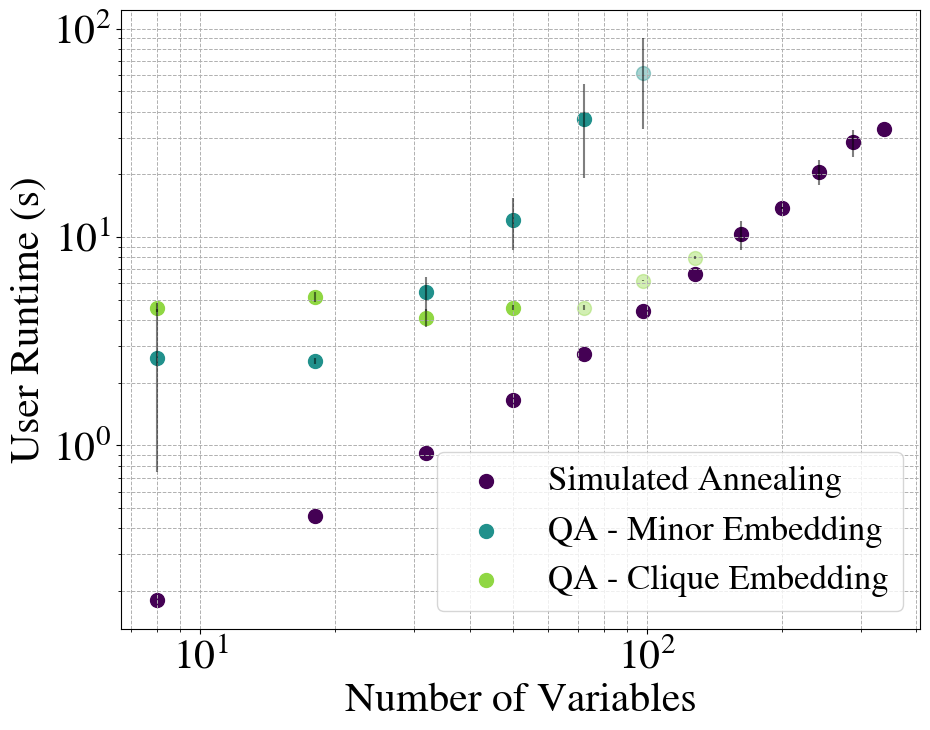

In [5]:

# Assuming you have the necessary data
nsuper_QA = [8,18,32,50,72]


dfsQA = []

time_avg_QA = []
time_std_QA  = []
for i in range(6):
    nsuper = i+2
    df = pd.read_csv(f"RawResults/QA_minor_nsuper{nsuper}_nV3.csv")
    time_avg_QA.append(df['Time_avg'].values)
    time_avg_QA = [float(a) for a in time_avg_QA]
    time_std_QA.append(df['Time_std'].values)
    time_std_QA = [float(a) for a in time_std_QA]


time_avg_QA_clique  = []
time_std_QA_clique  = []
for i in range(7):
    nsuper = i+2
    df = pd.read_csv(f"RawResults/QA_clique_nsuper{nsuper}_nV3.csv")
    time_avg_QA_clique.append(df['Time_avg'].values)
    time_avg_QA_clique = [float(a) for a in time_avg_QA_clique]
    time_std_QA_clique.append(df['Time_std'].values)
    time_std_QA_clique = [float(a) for a in time_std_QA_clique]


alpha_sub_opt = 0.4
alpha_QA = [1.0] * (len(time_avg_QA) - 1) + [alpha_sub_opt, alpha_sub_opt]  # Last two points less opaque
alpha_QA_clique = [1.0] * (len(time_avg_QA_clique) - 3) + [alpha_sub_opt] * 3


nsuper = [8,18,32,50,72,98,128,162,200,242,288, 338]
nsuper_QA = [8,18,32,50,72,98]
nsuper_QA_clique = [8,18,32,50,72,98,128]


# Plotting the data and the linear fit on the log-log scale
plt.figure(figsize=(10, 8))

# Simulated Annealing
plt.scatter(nsuper, time_avg, s=100, color=colour[0],
            label='Simulated Annealing')
plt.errorbar(nsuper, time_avg, yerr=time_std, fmt='none', color='black', alpha=0.5)

# QA - Minor Embedding
for i, (x, y) in enumerate(zip(nsuper_QA, time_avg_QA)):
    label = 'QA - Minor Embedding' if i == 0 else ''  # Add label only for the first point
    opacity = alpha_QA[i]
    plt.scatter([x], [y], s=100,color=colour[3], 
                alpha=opacity, label=label)
plt.errorbar(nsuper_QA, time_avg_QA, yerr=time_std_QA, fmt='none', color='black', alpha=0.5)

# QA - Clique Embedding
for i, (x, y) in enumerate(zip(nsuper_QA_clique, time_avg_QA_clique)):
    label = 'QA - Clique Embedding' if i == 0 else ''  # Add label only for the first point
    opacity = alpha_QA_clique[i]
    plt.scatter([x], [y], s=100, color=colour[5], 
                 alpha=opacity, label=label)
plt.errorbar(nsuper_QA_clique, time_avg_QA_clique, yerr=time_std_QA_clique, fmt='none', color='black', alpha=0.5)

plt.xscale('log')
plt.yscale('log')

# Labels and grid
plt.xlabel('Number of Variables')
plt.ylabel('User Runtime (s)')
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend(fontsize=25, loc='lower right')
plt.tight_layout()

# Save and show the plot
plt.savefig('final_plots/SCALINGplotTime_log_SA.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Plot embedding time

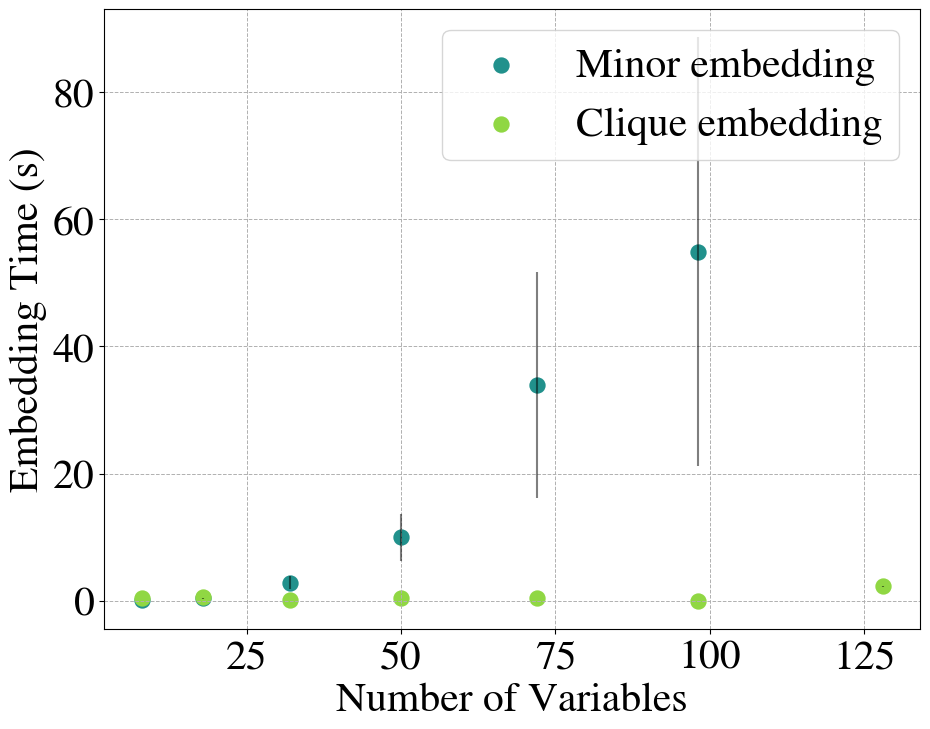

In [6]:
dfsQA = []

time_avg_QA = []
time_std_QA  = []
for i in range(6):
    nsuper = i+2
    df = pd.read_csv(f"RawResults/QA_minor_nsuper{nsuper}_nV3.csv")
    time_avg_QA.append(df['Emb_Time_avg'].values)
    time_avg_QA = [float(a) for a in time_avg_QA]
    time_std_QA.append(df['Emb_Time_std'].values)
    time_std_QA = [float(a) for a in time_std_QA]


time_avg_QA_clique = []
time_std_QA_clique  = []
for i in range(7):
    nsuper = i+2
    df = pd.read_csv(f"RawResults/QA_clique_nsuper{nsuper}_nV3.csv")
    time_avg_QA_clique.append(df['Emb_Time_avg'].values)
    time_avg_QA_clique = [float(a) for a in time_avg_QA_clique]
    time_std_QA_clique.append(df['Emb_Time_std'].values)
    time_std_QA_clique = [float(a) for a in time_std_QA_clique]




# nsuper = [8,18,32,50,72,98,128,162,200,242,288, 338]
nsuper_QA = [8,18,32,50,72,98]
nsuper_QA_clique = [8,18,32,50,72,98,128]



# Plotting the data and the linear fit on the log-log scale
plt.figure(figsize=(10, 8))


plt.scatter(nsuper_QA, time_avg_QA, s=100,  color=colour[3], linewidths=1.75, label='Minor embedding') # , label='Quantum Annealing'
# plt.plot(nsuper_QA, 10**(intercept_QA + slope_QA * log_nsuper_QA), color='navy', label=f'Fit: y = {slope_QA:.2f}x + {intercept_QA:.2f}') 
plt.errorbar(nsuper_QA, time_avg_QA, yerr=time_std_QA, fmt='none', color='black', alpha=0.5)


plt.scatter(nsuper_QA_clique, time_avg_QA_clique, s=100, color=colour[5],linewidths=1.75,  label='Clique embedding') # , label='Quantum Annealing'
# plt.plot(nsuper_QA, 10**(intercept_QA + slope_QA * log_nsuper_QA), color='navy', label=f'Fit: y = {slope_QA:.2f}x + {intercept_QA:.2f}') 
plt.errorbar(nsuper_QA_clique, time_avg_QA_clique, yerr=time_std_QA_clique, fmt='none', color='black', alpha=0.5)
# plt.xscale('log')
# plt.yscale('log')

plt.xlabel('Number of Variables')
plt.ylabel('Embedding Time (s)')
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('final_plots/SCALINGplot_embedding_time.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Plot chain lengths

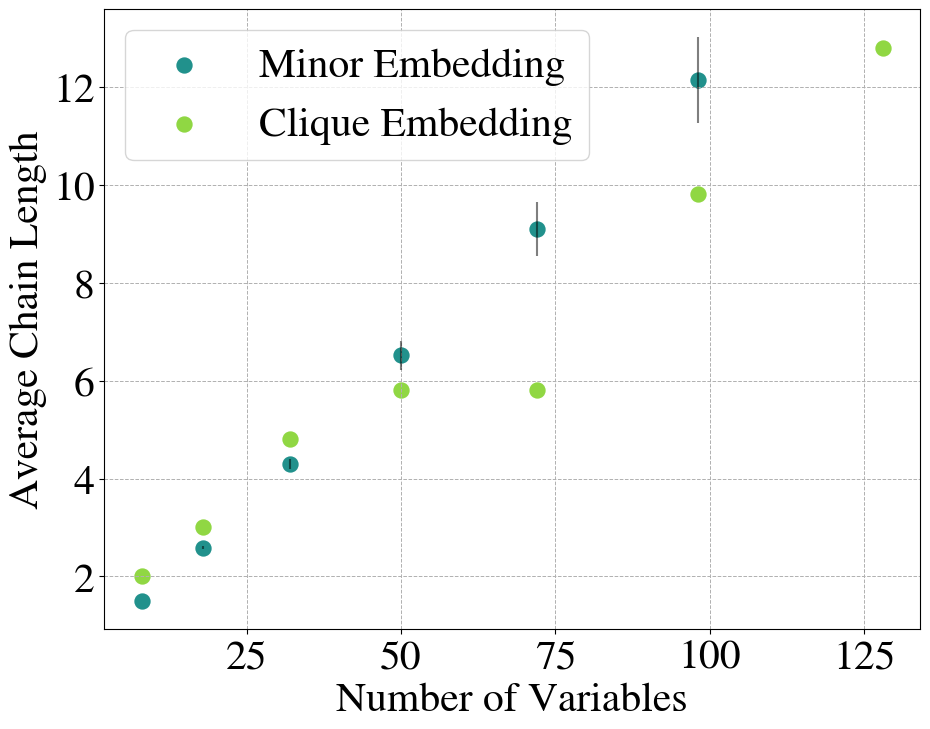

In [10]:
dfsQA = []

chain_avg_QA = []
chain_std_QA  = []
for i in range(6):
    nsuper = i+2
    df = pd.read_csv(f"RawResults/QA_nsuper{nsuper}_nV3.csv")
    chain_avg_QA.append(df['chain_length_avg'].values)
    chain_avg_QA = [float(a) for a in chain_avg_QA]
    chain_std_QA.append(df['chain_length_std'].values)
    chain_std_QA = [float(a) for a in chain_std_QA]


chain_avg_QA_clique = []
chain_std_QA_clique  = []
for i in range(7):
    nsuper = i+2
    df = pd.read_csv(f"RawResults/QA_clique_nsuper{nsuper}_nV3.csv")
    chain_avg_QA_clique.append(df['chain_length_avg'].values)
    chain_avg_QA_clique = [float(a) for a in chain_avg_QA_clique]
    chain_std_QA_clique.append(df['chain_length_std'].values)
    chain_std_QA_clique = [float(a) for a in chain_std_QA_clique]


nsuper_QA = [8,18,32,50,72,98]#,98]
nsuper_QA_clique = [8,18,32,50,72,98,128]


# Plotting the data and the linear fit on the log-log scale
plt.figure(figsize=(10, 8))

plt.scatter(nsuper_QA, chain_avg_QA, s=100,  color=colour[3], linewidths=1.75, label='Minor Embedding') # 
# plt.plot(nsuper_QA, 10**(intercept_QA + slope_QA * log_nsuper_QA), color='navy', label=f'Fit: y = {slope_QA:.2f}x + {intercept_QA:.2f}') 
plt.errorbar(nsuper_QA, chain_avg_QA, yerr=chain_std_QA, fmt='none', color='black', alpha=0.5)


plt.scatter(nsuper_QA_clique, chain_avg_QA_clique, s=100,  color=colour[5], linewidths=1.75, label='Clique Embedding') # , label='Quantum Annealing'
# plt.plot(nsuper_QA, 10**(intercept_QA + slope_QA * log_nsuper_QA), color='navy', label=f'Fit: y = {slope_QA:.2f}x + {intercept_QA:.2f}') 
plt.errorbar(nsuper_QA_clique, chain_avg_QA_clique, yerr=chain_std_QA_clique, fmt='none', color='black', alpha=0.5)
# plt.xscale('log')
# plt.yscale('log')

plt.xlabel('Number of Variables')
plt.ylabel('Average Chain Length')
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('final_plots/SCALINGplot_chain_length.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Broken chains plot

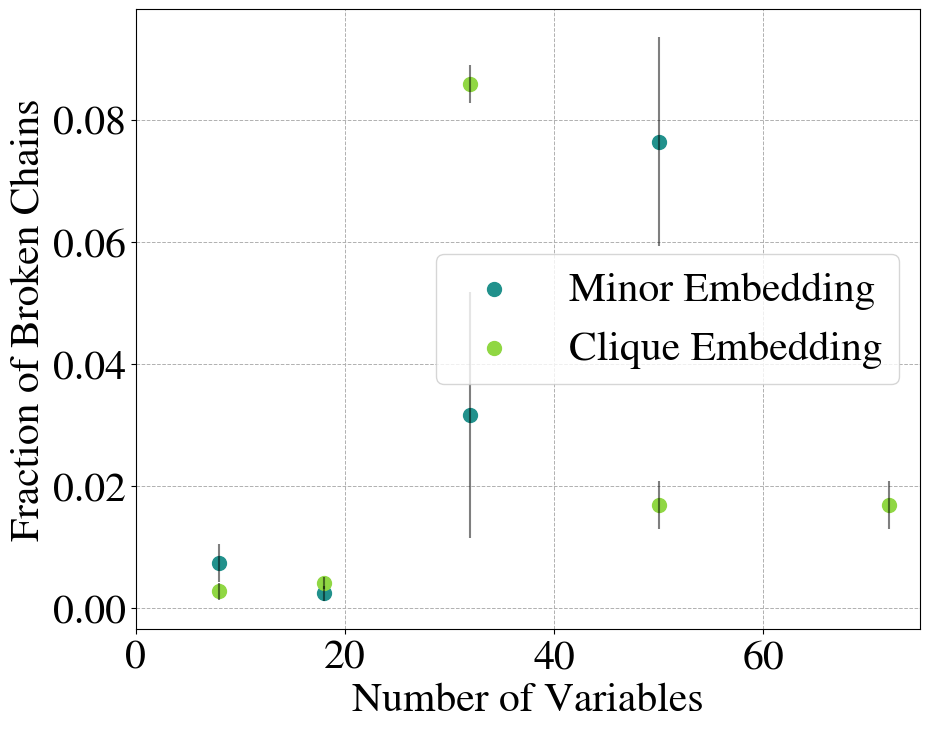

In [11]:
dfsQA = []

time_avg_QA = []
time_std_QA  = []
for i in range(6):
    nsuper = i+2
    df = pd.read_csv(f"RawResults/QA_minor_nsuper{nsuper}_nV3.csv")
    time_avg_QA.append(df['b_chains_avg'].values)
    time_avg_QA = [float(a) for a in time_avg_QA]
    time_std_QA.append(df['b_chains_std'].values)
    time_std_QA = [float(a) for a in time_std_QA]


time_avg_QA_clique = []
time_std_QA_clique  = []
for i in range(7):
    nsuper = i+2
    df_clique = pd.read_csv(f"RawResults/QA_clique_nsuper{nsuper}_nV3.csv")
    time_avg_QA_clique.append(df_clique['b_chains_avg'].values)
    time_avg_QA_clique = [float(a) for a in time_avg_QA_clique]
    time_std_QA_clique.append(df_clique['b_chains_std'].values)
    time_std_QA_clique = [float(a) for a in time_std_QA_clique]

# nsuper = [8,18,32,50,72,98,128,162,200,242,288, 338]
nsuper_QA = [8,18,32,50,72,98]
nsuper_QA_clique = [8,18,32,50,72,98,128]



# Plotting the data and the linear fit on the log-log scale
plt.figure(figsize=(10, 8))


plt.scatter(nsuper_QA, time_avg_QA, s=100, color=colour[3],  label='Minor Embedding') # , label='Quantum Annealing'
# plt.plot(nsuper_QA, 10**(intercept_QA + slope_QA * log_nsuper_QA), color='navy', label=f'Fit: y = {slope_QA:.2f}x + {intercept_QA:.2f}') 
plt.errorbar(nsuper_QA, time_avg_QA, yerr=time_std_QA, fmt='none', color='black', alpha=0.5)

plt.scatter(nsuper_QA_clique, time_avg_QA_clique, s=100, color=colour[5],  label='Clique Embedding') # , label='Quantum Annealing'
# plt.plot(nsuper_QA, 10**(intercept_QA + slope_QA * log_nsuper_QA), color='navy', label=f'Fit: y = {slope_QA:.2f}x + {intercept_QA:.2f}') 
plt.errorbar(nsuper_QA_clique, time_avg_QA_clique, yerr=time_std_QA_clique, fmt='none', color='black', alpha=0.5)
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0,75)

plt.xlabel('Number of Variables')
plt.ylabel('Fraction of Broken Chains')
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('final_plots/SCALINGplot_b_chains.pdf', format='pdf', bbox_inches='tight')
plt.show()

## QPU time plots

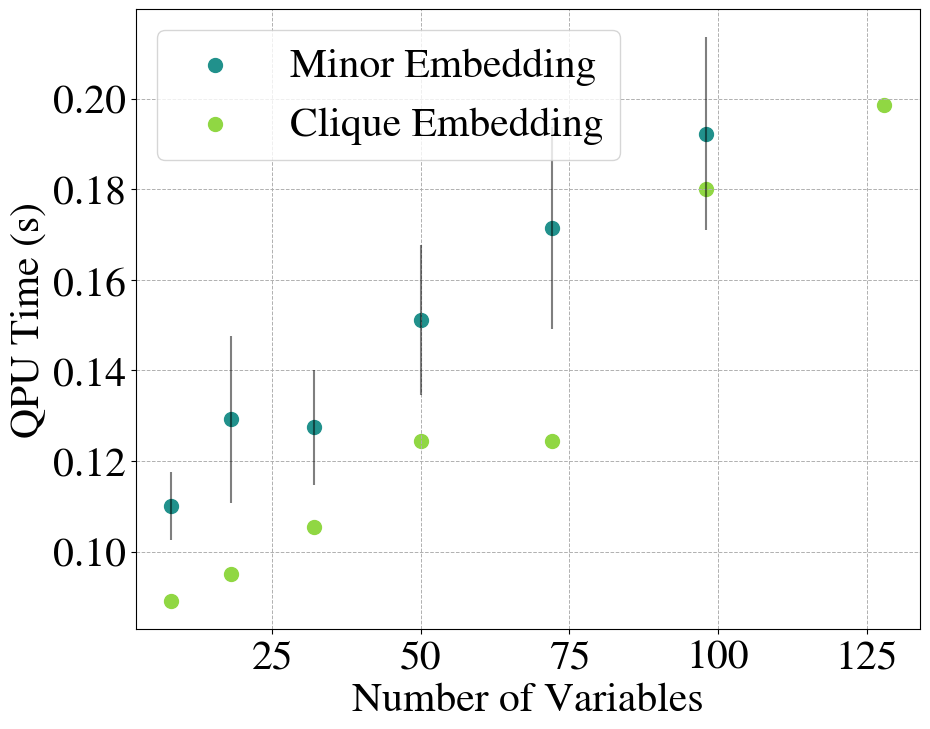

In [12]:
dfsQA = []

time_avg_QA = []
time_std_QA  = []
for i in range(6):
    nsuper = i+2
    df = pd.read_csv(f"RawResults/QA_minor_nsuper{nsuper}_nV3.csv")
    time_avg_QA.append(df['QPU_Acc_Time_avg'].values)
    time_avg_QA = [float(a) for a in time_avg_QA]
    time_std_QA.append(df['QPU_Acc_Time_std'].values)
    time_std_QA = [float(a) for a in time_std_QA]


time_avg_QA_clique = []
time_std_QA_clique  = []
for i in range(7):
    nsuper = i+2
    df_clique = pd.read_csv(f"RawResults/QA_clique_nsuper{nsuper}_nV3.csv")
    time_avg_QA_clique.append(df_clique['QPU_Acc_Time_avg'].values)
    time_avg_QA_clique = [float(a) for a in time_avg_QA_clique]
    time_std_QA_clique.append(df_clique['QPU_Acc_Time_std'].values)
    time_std_QA_clique = [float(a) for a in time_std_QA_clique]


# nsuper = [8,18,32,50,72,98,128,162,200,242,288, 338]
nsuper_QA = [8,18,32,50,72,98]
nsuper_QA_clique = [8,18,32,50,72,98,128]



# Plotting the data and the linear fit on the log-log scale
plt.figure(figsize=(10, 8))


plt.scatter(nsuper_QA, time_avg_QA, s=100, color=colour[3],  label='Minor Embedding') # , label='Quantum Annealing'
# plt.plot(nsuper_QA, 10**(intercept_QA + slope_QA * log_nsuper_QA), color='navy', label=f'Fit: y = {slope_QA:.2f}x + {intercept_QA:.2f}') 
plt.errorbar(nsuper_QA, time_avg_QA, yerr=time_std_QA, fmt='none', color='black', alpha=0.5)

plt.scatter(nsuper_QA_clique, time_avg_QA_clique, s=100, color=colour[5],  label='Clique Embedding') # , label='Quantum Annealing'
# plt.plot(nsuper_QA, 10**(intercept_QA + slope_QA * log_nsuper_QA), color='navy', label=f'Fit: y = {slope_QA:.2f}x + {intercept_QA:.2f}') 
plt.errorbar(nsuper_QA_clique, time_avg_QA_clique, yerr=time_std_QA_clique, fmt='none', color='black', alpha=0.5)
# plt.xscale('log')
# plt.yscale('log')

plt.xlabel('Number of Variables')
plt.ylabel('QPU Time (s)')
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('final_plots/SCALINGplot_QPU_time.pdf', format='pdf', bbox_inches='tight')
plt.show()